# Example 1 - Fitting a Log-Normal Distribution to Time Series Data

Step 1: Load the Data

Use Python's pandas library to load the time series data from the following URL:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv'

The data is in CSV format and contains daily closing prices of Apple Inc. stock from January 2010 to December 2013.


Step 2: Extract the Relevant Column
Extract the "AAPL.Close" column from the loaded data using pandas and store it in a variable called prices.


Step 3: Fit a Log-Normal Distribution
Use scipy.stats to fit a log-normal distribution to the prices data. Store the estimated shape, location, and scale parameters of the fitted distribution in variables called shape, loc, and scale, respectively.


Step 4: Generate the PDF of the Fitted Distribution
Generate the PDF of the fitted log-normal distribution using the estimated parameters obtained in Step 3. Use numpy to generate 100 equally spaced values between 0 and 500 for the x-axis.


Step 5: Plot the Results
Use matplotlib to generate a plot of the actual data and the PDF of the fitted log-normal distribution.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Read time series data from online CSV file
url = 'https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv'
df = pd.read_csv(url)

df


,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing
...,...,...,...,...,...,...,...,...,...,...,...
501,2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,114.494004,124.498666,134.503328,Decreasing
502,2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,114.820798,125.205166,135.589534,Increasing
503,2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,115.175718,125.953499,136.731280,Increasing
504,2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995,115.545035,126.723499,137.901963,Decreasing


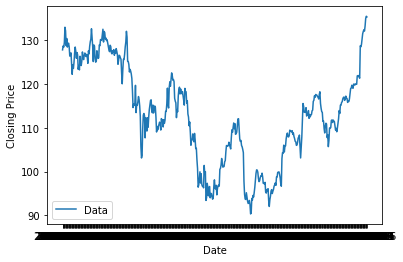

In [27]:
# Extract the closing price column from the data
prices = df['AAPL.Close']

# Plot the time series data along with the fitted log-normal distribution
fig, ax = plt.subplots()
ax.plot(df['Date'], prices)
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend(['Data'])
plt.show()

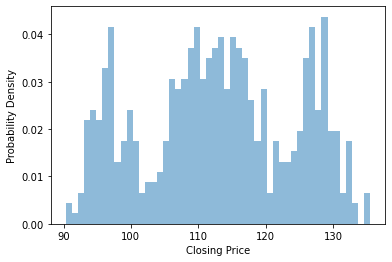

In [28]:
fig, ax = plt.subplots()
ax.hist(prices, bins=50, density=True, alpha=0.5)
ax.set_xlabel('Closing Price')
ax.set_ylabel('Probability Density')
plt.show()

In [29]:
# Fit a log-normal distribution to the data
shape, loc, scale = lognorm.fit(prices)

# Generate the PDF of the log-normal distribution using the estimated parameters
x = np.linspace(0, 500, 100)
pdf = lognorm.pdf(x, shape, loc, scale)

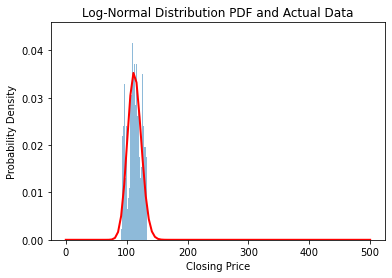

In [30]:
fig, ax = plt.subplots()
ax.hist(prices, bins=50, density=True, alpha=0.5)
ax.plot(x, pdf, 'r', linewidth=2)
ax.set_xlabel('Closing Price')
ax.set_ylabel('Probability Density')
ax.set_title('Log-Normal Distribution PDF and Actual Data')
plt.show()

# Example 2: Comparing the statistical properties of two distributions

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


# Generate two sets of data
data1 = np.random.normal(50, 10, size=1000)
data2 = np.random.exponential(scale=20, size=1000)

# Calculate and print the mean, median, and mode for both datasets
print("Dataset 1")
print("Mean:", np.mean(data1))
print("Median:", np.median(data1))
print("Mode:", np.argmax(np.bincount(data1.astype('int64'))))

print("\nDataset 2")
print("Mean:", np.mean(data2))
print("Median:", np.median(data2))
print("Mode:", np.argmax(np.bincount(data2.astype('int64'))))

# Calculate and print the variance, standard deviation, skewness, and kurtosis for both datasets
print("\nDataset 1")
print("Variance:", np.var(data1))
print("Standard deviation:", np.std(data1))
print("Skewness:", skew(data1))
print("Kurtosis:", kurtosis(data1))

print("\nDataset 2")
print("Variance:", np.var(data2))
print("Standard deviation:", np.std(data2))
print("Skewness:", skew(data2))
print("Kurtosis:", kurtosis(data2))


Dataset 1
Mean: 50.07654833412745
Median: 50.13329976416662
Mode: 52

Dataset 2
Mean: 19.46951484980268
Median: 13.563387993708762
Mode: 0

Dataset 1
Variance: 95.58126524214406
Standard deviation: 9.776567150188457
Skewness: 0.10887930940996304
Kurtosis: -0.004097944777959217

Dataset 2
Variance: 372.5099719772056
Standard deviation: 19.300517401800544
Skewness: 1.6810445357372839
Kurtosis: 3.181994583335106


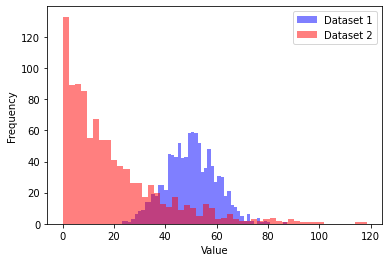

In [22]:
fig, ax = plt.subplots()
ax.hist(data1, bins=50, alpha=0.5, color='blue', label='Dataset 1')
ax.hist(data2, bins=50, alpha=0.5, color='red', label='Dataset 2')
ax.legend(loc='upper right')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
plt.show()

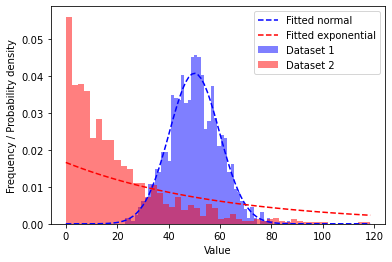

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon


# Fit the normal distribution to the first dataset
mu1, sigma1 = norm.fit(data1)

# Fit the exponential distribution to the second dataset
lambd2 = expon.fit(data2)[0]

# Create a range of x values for the fitted distributions
x = np.linspace(min(min(data1), min(data2)), max(max(data1), max(data2)), 100)

# Calculate the fitted distributions for both datasets
fit1 = norm.pdf(x, loc=mu1, scale=sigma1)
fit2 = expon.pdf(x, scale=1/lambd2)

# Plot the histograms of the data and the fitted distributions
fig, ax = plt.subplots()
ax.hist(data1, bins=50, alpha=0.5, density=True, color='blue', label='Dataset 1')
ax.hist(data2, bins=50, alpha=0.5, density=True, color='red', label='Dataset 2')
ax.plot(x, fit1, color='blue', linestyle='--', label='Fitted normal')
ax.plot(x, fit2, color='red', linestyle='--', label='Fitted exponential')
ax.legend(loc='upper right')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency / Probability density')
plt.show()
